### problem description
Our goal is to predict the 'fair price' of an available house posted on Airbnb, depending on its features such as location, facilities nearby, size of the house, type of beds and so on.

First we need to summarize the features of each house in the list. Based on the dataset named 'listing' and 'venues'.
___
### Summary
#### Our main work is as follows:
1. We plot the house distribution 
2. We analyzed the types of venues 
3. We predicted the housing price
4. We analyzed the volatility of housing price in one year.


___
### main results:
1. Distribution of Airbnb houses in NYC


2. Tags and distribution of venues 

We can get the venues by listing all the tags listed in 'Venue'.
For each entry, we can get its tags and get an unique set of all the tags.
Then we denote this information in a sparse matrix. For each factor, we use 1 to show that 1 certain place has certain tag such as 'transit_station', 'post_office', etc. And we use 0 to show that it does not have one.
For example, entry'Times Sq - 42 St' has the tags ['transit_station', 'point_of_interest', 'establishment']

Such is a tiny version of this matrix:


venue_id | food | bar |point_of_interest|establishment
----|------|----
Times Sq - 42 St| 0  | 0|1|1
Checkers | 1 | 0|1|1
Chez Kama| 1  | 1|1|1

And the one we generated from our program is just much larger.

Once we get this sparse matrix, combined with its location details (longitude&latitude) with certain houses' location information(longitude&latitude), we can get the distribution of certain tags around each Airbnb house listed in the dataset. And all this is for possible later use





3. We predict the housing price by factor models.


$ \hat{Price} = \sum_{i = 1} ^{|all_factors|} \hat{a_i}x_i $ 
$x_i$:

where $x_i$ denotes the $i-th$ factor





In [57]:
%pwd


u'/Users/wrk/Documents/python_environment/NYC Datathon Materials'

In [58]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab as pl
from datetime import datetime

In [96]:
oneday = datetime.strptime("03/03/2017","%m/%d/%Y")-datetime.strptime("03/02/2017","%m/%d/%Y")
t = time.time()
data = pd.read_csv('calendar.csv',nrows=50000)
print time.time()-t
print len(data)


0.0258831977844
50000


In [97]:
prices = {}
for i in range(len(data)):
    dt = data.ix[i]
    p = dt.price
    try:
        p = float(p[1:])
    except Exception:
        continue

    if dt.date not in prices:
        prices[dt.date] = [p]
    else:
        prices[dt.date].append(p)
days = []
rents = []
avail = []
for key in prices:
    p = prices[key]
    av = sum(p)/len(p)
    print len(p)
    avail.append(len(p))
    rents.append(av)
    days.append(datetime.strptime(key,"%M/%d/%y"))


107
109
69
99
87
108
86
108
89
106
78
79
106
87
70
105
107
40
100
67
107
36
75
106
94
108
84
40
43
108
86
106
109
109
108
93
108
95
96
93
40
109
69
92
43
109
105
94
96
94
109
109
105
95
107
109
93
89
96
88
84
108
79
86
81
89
108
85
73
45
92
95
86
66
87
74
70
90
39
9
28
93
87
95
108
94
78
90
95
108
89
97
87
74
69
29
108
64
55
91
93
93
74
75
95
107
91
9
26
91
61
92
80
60
87
89
108
70
109
87
109
72
109
75
43
89
71
90
92
73
83
92
109
48
93
94
70
67
109
105
74
94
108
108
88
108
79
106
59
50
109
95
94
109
86
95
108
108
90
62
76
109
82
105
108
107
92
108
85
72
108
55
58
108
87
108
108
31
72
55
93
94
94
61
91
77
108
72
108
56
94
85
94
91
108
94
108
66
108
92
3
52
79
96
96
107
55
81
108
80
64
91
108
51
108
80
78
82
57
109
108
46
107
80
108
81
76
108
56
80
51
73
109
80
53
75
64
74
109
95
62
73
56
48
108
69
86
108
61
89
108
109
96
95
95
109
107
108
60
96
80
83
66
76
63
64
75
108
94
73
108
109
106
107
88
88
107
73
74
84
96
71
79
85
109
109
39
109
96
108
74
65
109
88
108
108
101
58
97
72
41
79
93
8

/Applications/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,center=False).mean()


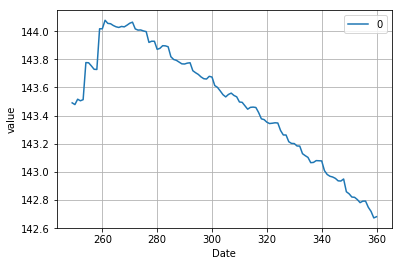

In [99]:
whole = zip(days,rents,avail)
whole.sort(key = lambda x:x[0])
days = [t[0] for t in whole]
rents = [t[1] for t in whole]
avail = [t[2] for t in whole]
# pl.plot_date(days[4:-3],rents[4:-3],fmt = '-', color = 'red')
# pl.grid()
# pl.show()
# pl.close()
# pl.plot_date(days[4:-3],avail[4:-3], fmt = '-')
# plt.grid()
# pl.show()
# pl.close()

# pl.plot_date(days[4:-3],rents[4:-3],fmt = '-', color = 'red')
# pl.plot_date(days[4:-3],avail[4:-3], fmt = '-')
# pl.show()
# print 1
plt.figure(figsize=(17, 4))
#plt.plot(rents[4:-3],'b',lw=1.5)
ss=pd.DataFrame(rents[4:-3])
pd.rolling_mean(ss, 250).plot()
plt.axis('tight')
plt.grid(True)
plt.axis('tight') 


plt.xlabel('Date')
plt.ylabel('value')
plt.show()


